In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
plt.rc('font', **{'size':'20'}) # Adjusting default font size
plt.rcParams["figure.figsize"] = (5,5) # Setting default figure size

In [3]:
# Reads MIST track data and filters based on evolutionary phase, returning arrays of log luminosity, 
# effective temperature and phase
def read_track_data(file_path,phase_start,phase_end):
    
    """
    Phase:
    -1 pre-main sequence (PMS)
     0 main sequence (+subgiant branch) (MS)
     2 red giant branch (RGB)
     3 zero-age core helium burning (ZACHeB)
     4 early asymptotic giant branch (EAGB)
     5 thermally pulsating asymptotic giant branch (TPAGB)
     6 post-asymptotic giant branch (postAGB)
     7 white dwarf cooling sequence (WR)
    """    

    logL = []
    teff = []
    phase = []
    
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            
            # Skip the first 12 lines (file headers)
            lines = lines[12:]

            for line in lines:
                
                # Extracting data based on column positions
                logL_val = float(line[202:226])
                teff_val = 10**float(line[362:386])
                phase_val = float(line[2441:2466])

                # Filtering based on the phase
                if phase_start <= phase_val <= phase_end:
                    logL.append(logL_val)
                    teff.append(teff_val)
                    phase.append(phase_val)
                    
    except FileNotFoundError:
        print(f"Error: File not found.")
        
    # Convert lists to NumPy arrays
    logL = np.array(logL)
    teff = np.array(teff)
    phase = np.array(phase)
    
    return logL, teff, phase

In [4]:
# Reading tracks.
logL_08, teff_08, phase08 = read_track_data('00080M.track.eep',0,2)
logL_10, teff_10, phase10 = read_track_data('00100M.track.eep',0,2)
logL_12, teff_12, phase12 = read_track_data('00120M.track.eep',0,2)

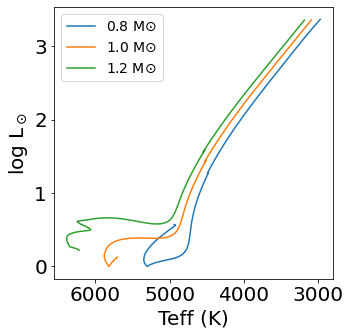

In [5]:
# Visualizing evolutionary tracks
plt.plot(teff_08,logL_08,label='0.8 M$\odot$')
plt.plot(teff_10,logL_10,label='1.0 M$\odot$')
plt.plot(teff_12,logL_12,label='1.2 M$\odot$')
plt.gca().invert_xaxis()
plt.xlabel('Teff (K)')
plt.ylabel('log L$_\odot$')
plt.legend(fontsize=14)
plt.show()

In [6]:
# Opening the binary stars final selection as a Dataframe
final_selection = pd.read_csv('final_selection_bin.csv')

In [7]:
# Creating a folder to save the images
dirName = 'Results'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  Results  already exists


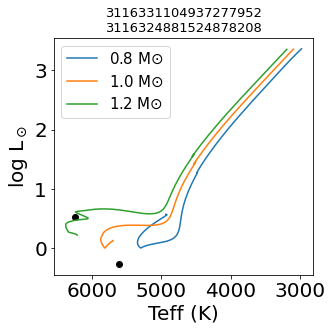

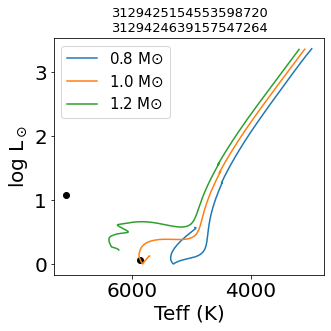

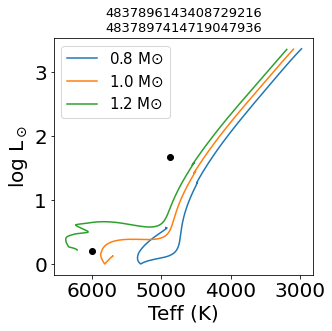

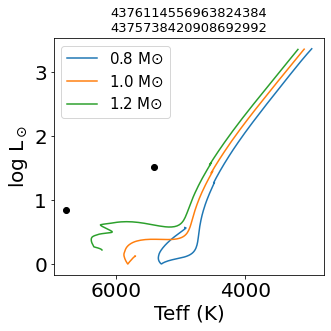

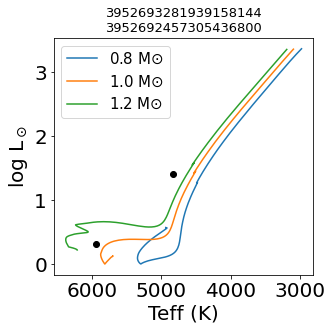

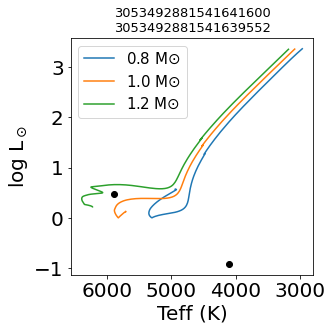

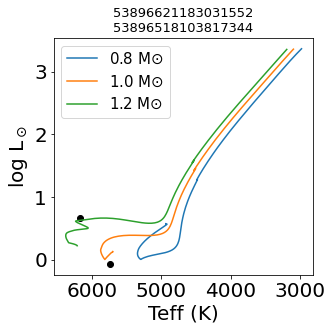

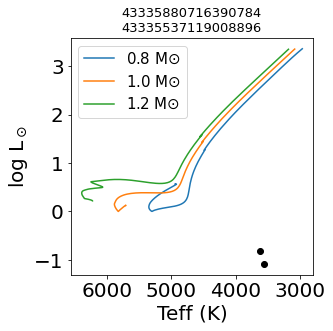

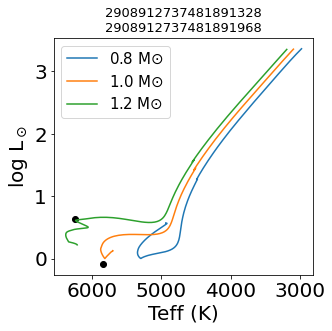

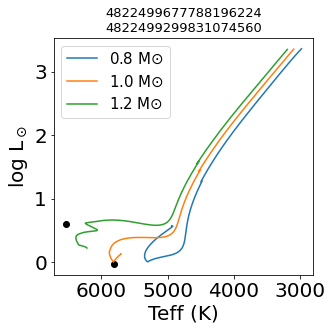

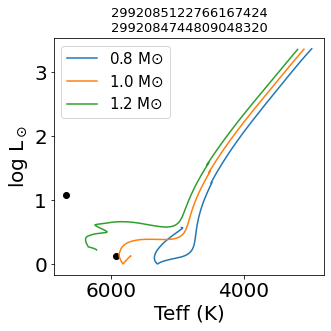

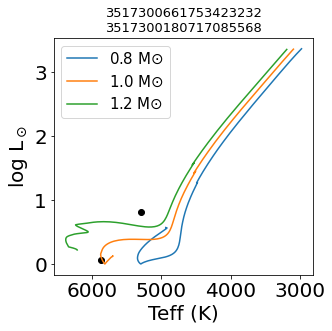

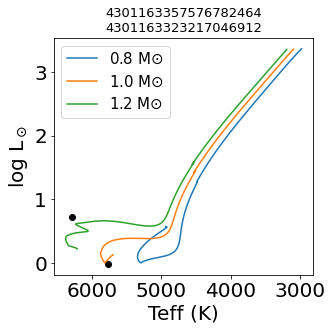

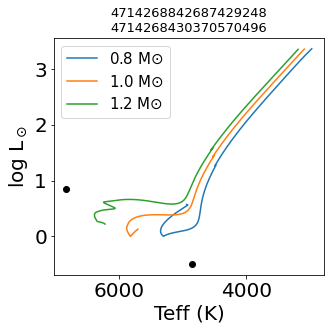

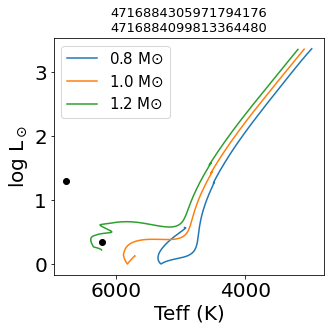

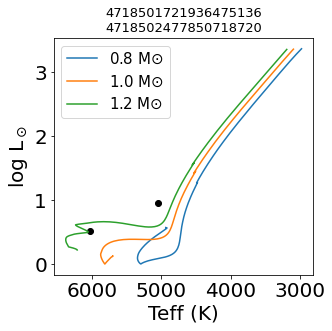

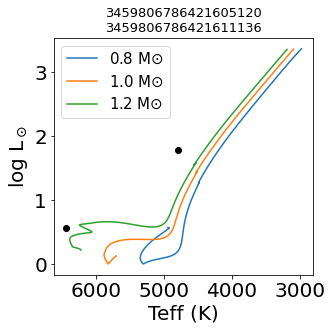

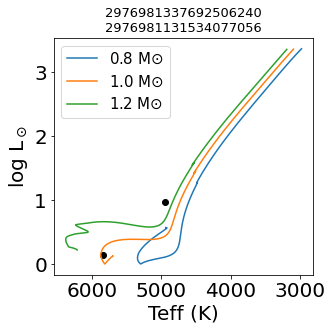

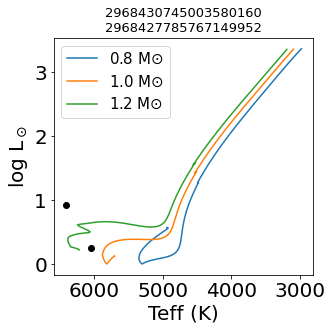

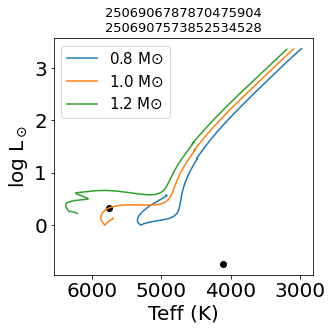

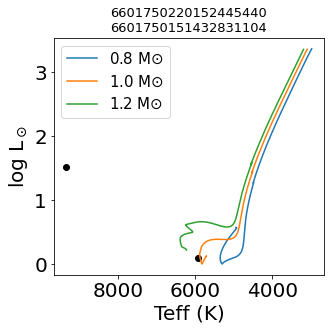

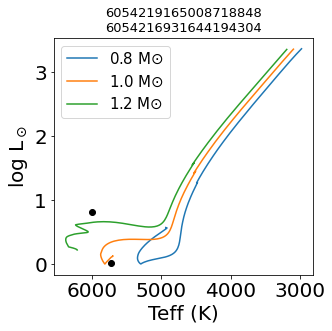

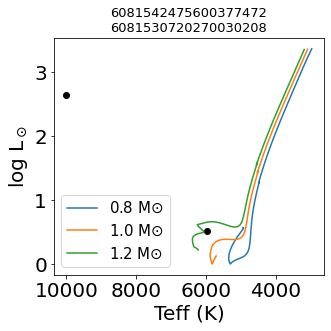

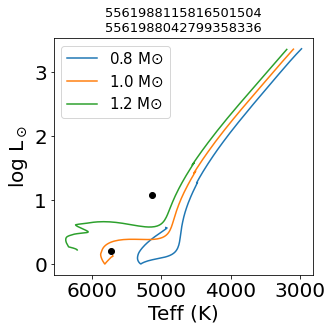

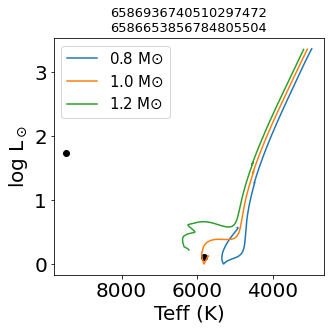

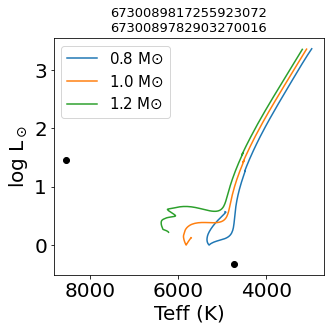

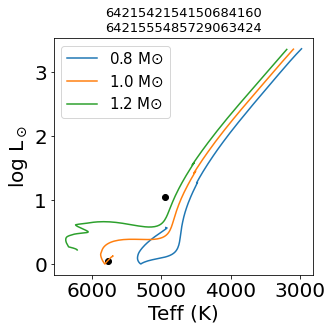

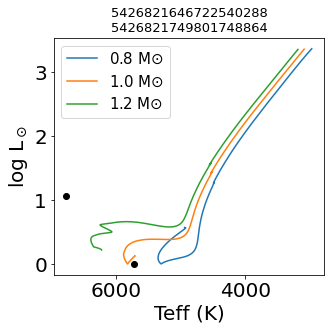

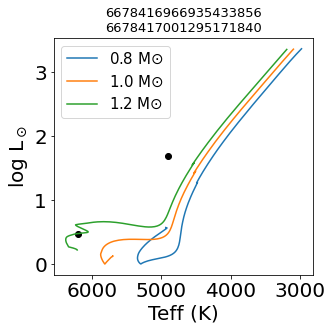

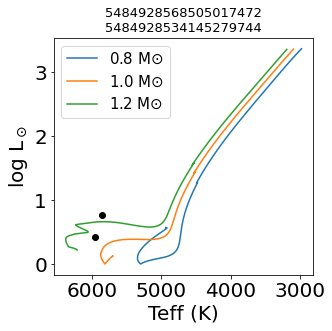

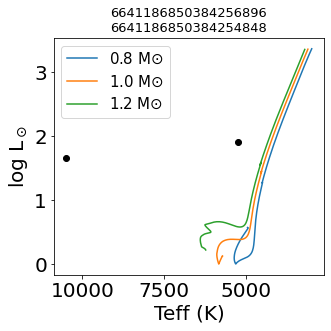

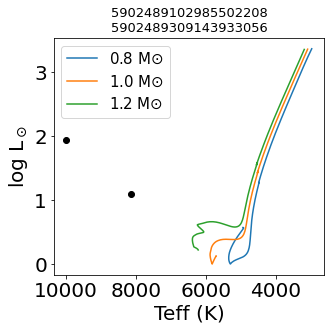

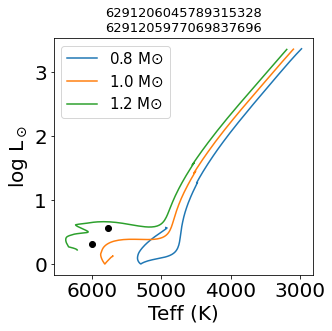

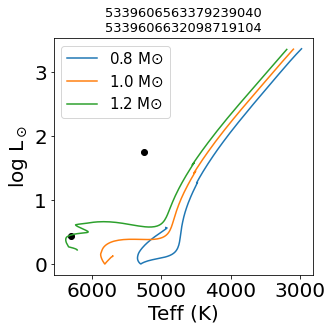

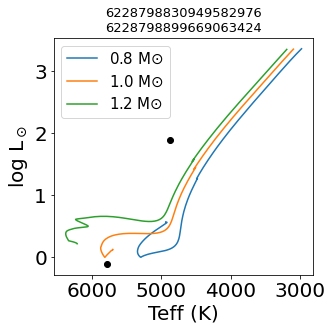

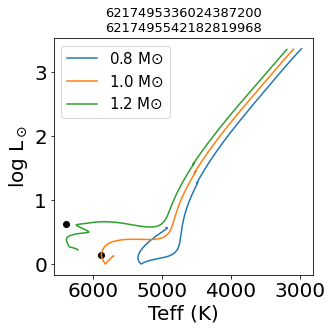

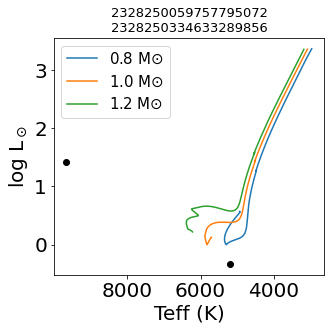

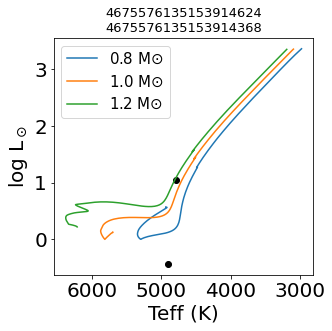

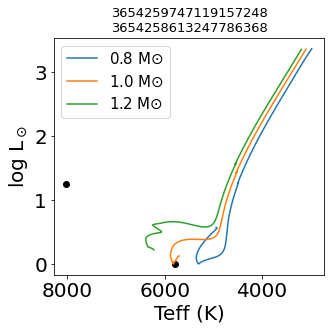

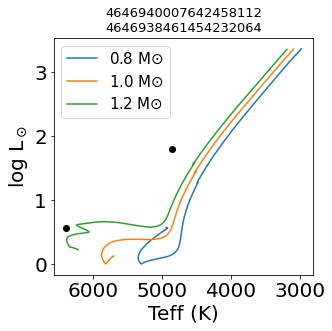

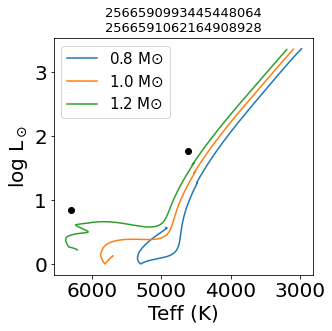

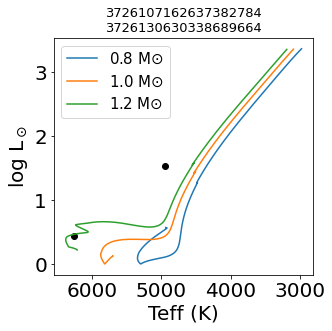

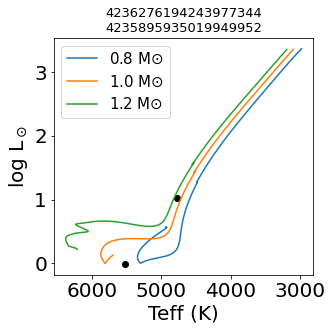

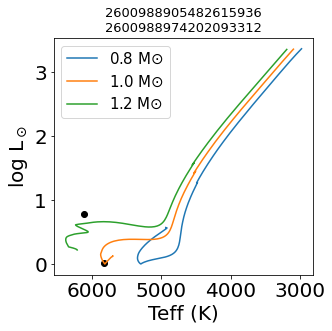

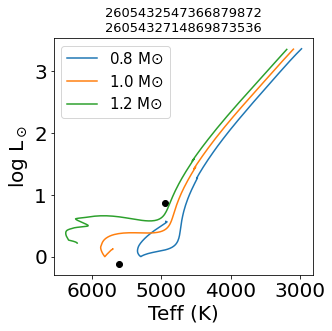

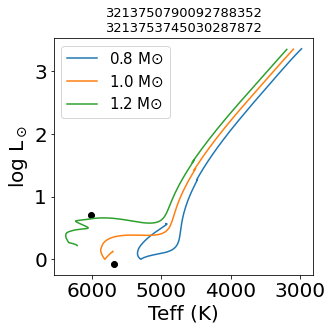

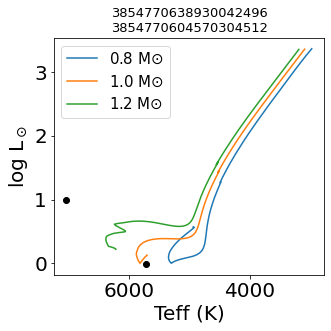

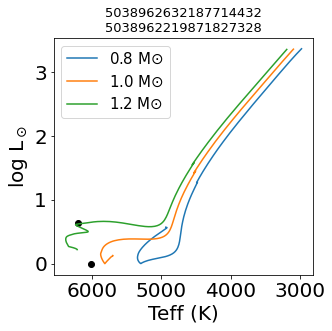

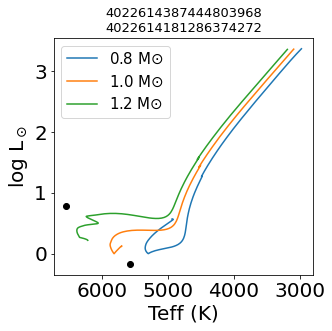

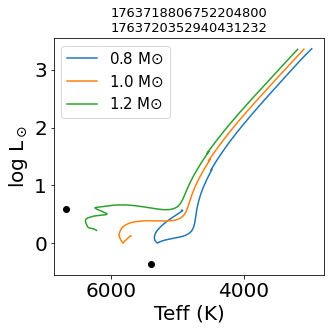

In [8]:
# Loop to plot each graph individually and save the plot to the folder
for i in range(len(final_selection)):
    
    # Scatter plot for the stars
    plt.scatter(final_selection['Teff_1'].iloc[i],np.log10(final_selection['lum1'].iloc[i]),color='k')
    plt.scatter(final_selection['Teff_2'].iloc[i],np.log10(final_selection['lum2'].iloc[i]),color='k')
    
    # Evolutionary tracks
    plt.plot(teff_08,logL_08,label='0.8 M$\odot$')
    plt.plot(teff_10,logL_10,label='1.0 M$\odot$')
    plt.plot(teff_12,logL_12,label='1.2 M$\odot$')
    
    # Inverting x-axis
    plt.gca().invert_xaxis()
    
    plt.xlabel('Teff (K)')
    plt.ylabel('log L$_\odot$')
    plt.legend(fontsize=15)
    plt.title(str(final_selection['ID1'].iloc[i])+'\n'+str(final_selection['ID2'].iloc[i]),fontsize=13)
    
    plt.tight_layout()
    plt.savefig('Results/'+str(i)+'.jpg',dpi=150)
    plt.show()